In [2]:
import torch

print(torch.__version__)
print(torch.cuda.is_available())

2.8.0+cu126
True


In [3]:
x = torch.tensor([1.0, 2.], requires_grad=True) # requires_grad : 기울기를 갖는 지 아닌 지 
y = x*2 # 연산 정의와 동시에 실행
z = y.sum() # 계산 그래프가 동적으로 생성됨
z.backward() # 역전파로 기울기 계산
print(x.grad) # 기울기 출력

tensor([2., 2.])


In [4]:
z

tensor(6., grad_fn=<SumBackward0>)

In [5]:
x = torch.tensor([[1, -1],
                  [-1,1]])
x

tensor([[ 1, -1],
        [-1,  1]])

In [6]:
print(torch.tensor([1,2,3])) # dtype = Long
print(torch.Tensor([[1,2,3], # torch.Tensor(array) dtype = Float
                    [4,5,6]])) # dtype = Float
print(torch.LongTensor([1,2,3])) # dtype = Long
print(torch.FloatTensor([1,2,3])) # dtype = Float

tensor([1, 2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([1, 2, 3])
tensor([1., 2., 3.])


In [8]:
tensor = torch.rand(1,2) # 1행 2열
tensor.shape

torch.Size([1, 2])

In [11]:
tensor.dtype, tensor.device

(torch.float32, device(type='cpu'))

In [17]:
print(torch.cuda.is_available())
torch.cuda.get_device_name()

True


'NVIDIA GeForce GTX 1060 3GB'

In [18]:
tensor = tensor.reshape(2,1)
print(tensor)
print(tensor.shape)

tensor([[0.9417],
        [0.6667]])
torch.Size([2, 1])


In [ ]:
tensor.sum(), tensor.mean(), tensor.max(), tensor.min() # numpy array 연관 함수 대다수 사용 가능

(tensor(1.6084), tensor(0.8042), tensor(0.9417), tensor(0.6667))

In [ ]:
tensor = torch.rand((3,3))
print(tensor)
print(tensor.dtype)
print("====== dtype 설정 시 ======")
tensor = torch.rand((3,3), dtype=torch.float)
print(tensor)
print(tensor.dtype)
print("======================================================")
print( "dtype을 설정하지 않고 실수를 사용하면 기본값이 float32")
tensor = torch.tensor([0.00001])
print(tensor)
print(tensor.dtype)
print( "torch.rand 기본 값은 소수점 넷째자리까지")
print("======================================================")

tensor = torch.tensor([10**-39]) # -39승 까지 정확하게 표현 
print(tensor)
print(tensor.dtype)

tensor([[0.5839, 0.5495, 0.0300],
        [0.1508, 0.9572, 0.1063],
        [0.2681, 0.1463, 0.5376]])
torch.float32
====== dtype 설정 시 ======
tensor([[0.3638, 0.9418, 0.7947],
        [0.8631, 0.9753, 0.4068],
        [0.1028, 0.6906, 0.9580]])
torch.float32
dtype을 설정하지 않고 실수를 사용하면 기본값이 float32
tensor([1.0000e-05])
torch.float32
torch.rand 기본 값은 소수점 넷째자리까지
tensor([1.0000e-39])
torch.float32


In [43]:
device = "cuda" if torch.cuda.is_available() else "cpu"
cpu = torch.FloatTensor([1,2,3])
gpu = torch.cuda.FloatTensor([1,2,3])
tensor = torch.rand((1,1),device=device)
print(device)
print(cpu)
print(gpu)
print(tensor)

cuda
tensor([1., 2., 3.])
tensor([1., 2., 3.], device='cuda:0')
tensor([[0.3558]], device='cuda:0')


In [44]:
# cpu와 달리 gpu는 텐서와 넘파이 배열 간 연산이 불가능

cpu = torch.FloatTensor([1,2,3])
gpu = cpu.cuda()

cpu, gpu

(tensor([1., 2., 3.]), tensor([1., 2., 3.], device='cuda:0'))

In [45]:
gpu.cpu()

tensor([1., 2., 3.])

In [46]:
cpu2gpu = cpu.to('cuda')
cpu2gpu

tensor([1., 2., 3.], device='cuda:0')

In [47]:
import numpy as np

np.__version__

'2.1.2'

In [57]:
a = np.array([1,2,3], dtype = np.uint8)
a

array([1, 2, 3], dtype=uint8)

In [58]:
b = np.array([1,2,3])
a + b

array([2, 4, 6])

In [ ]:
print(torch.tensor(a)) # 기존 a np.array의 성격을 그대로, 메모리를 복사, 얕은 복사??
print(torch.Tensor(a))

tensor([1, 2, 3], dtype=torch.uint8)
tensor([1., 2., 3.])


In [ ]:
torch.from_numpy(a) # 메모리를 공유하지 않아 조금 더 빠른 연산이 가능 => 깊은 복사

tensor([1, 2, 3], dtype=torch.uint8)

In [64]:
a, a.shape

(array([1, 2, 3], dtype=uint8), (3,))

In [65]:
print(a)
print(torch.tensor(a)+1)
print(a)

[1 2 3]
tensor([2, 3, 4], dtype=torch.uint8)
[1 2 3]


In [73]:
# detach 방식
tensor = torch.cuda.FloatTensor([1,2,3])
tensor
# np.array(tensor) # can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
# tensor.numpy() # can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
tensor.cpu().numpy()

array([1., 2., 3.], dtype=float32)

In [ ]:
ndarray = tensor.detach().cpu().numpy() # 계산 그래프에서 분리 : detach
ndarray

array([1., 2., 3.], dtype=float32)

## **torch.from_numpy:**
- 대규모 데이터에서 메모리 효율성을 중시하거나, 빠른 변환 속도가 필요할 때.
- 원본 NumPy 배열과 텐서 간 데이터 동기화가 필요할 때.
- 단, 메모리 공유로 인한 부작용(의도치 않은 데이터 수정)을 주의해야 함.
<br>
---
## **torch.tensor:**
- 원본 데이터와 독립적인 텐서를 만들고 싶을 때.
- 특정 dtype이나 device(GPU 등)로 텐서를 생성해야 할 때.
- 코드의 안정성과 명확성을 위해 메모리 공유를 피하고 싶을 때
<br>
---

## **tensor.detach().cpu().numpy() vs tensor.cpu().numpy()**
- detach() => 계산 그래프에서 떼어내서 연산 시 영향이 없어짐.
- 안정적인 분리 시에 반드시 활용 필요 => 파이썬에서 깊은 복사 .copy()와 같은 중요도
<br>
---

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

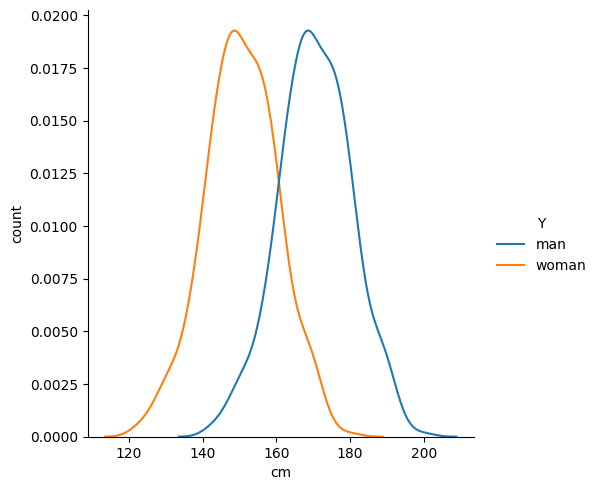

In [ ]:
man_height = stats.norm.rvs(loc = 170, scale=10, size = 500, random_state=1) # norm : Normaliztion rvs : random values
woman_height = stats.norm.rvs(loc = 150, scale=10, size = 500, random_state=1)

X = np.concatenate([man_height,woman_height])
Y = ["man"] * len(man_height) + ['woman'] * len(woman_height)

df = pd.DataFrame(list(zip(X,Y)),columns=['X','Y'])
fig = sns.displot(data=df, x="X", hue = "Y", kind = 'kde')
fig.set_axis_labels("cm","count")
plt.show()

# 단순 선형 회귀

In [84]:
import numpy as np

x = np.array(
    [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]]
)
y = np.array(
    [[0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]]
)

In [ ]:
# 학습과정 설정
weight = 0.0
bias = 0.0
learning_rate = 0.005

In [ ]:
for epoch in range(10000):
    y_hat = weight * x + bias

    cost = ((y - y_hat) ** 2).mean() # MSE

    weight = weight - learning_rate * ((y_hat - y) * x).mean() # 학습과정 명시
    bias = bias - learning_rate * (y_hat - y).mean() # 학습과정 명시

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Weight : {weight:.3f}, Bias : {bias:.3f}, Cost : {cost:.3f}")

Epoch : 1000, Weight : 0.872, Bias : -0.290, Cost : 1.377
Epoch : 2000, Weight : 0.877, Bias : -0.391, Cost : 1.373
Epoch : 3000, Weight : 0.878, Bias : -0.422, Cost : 1.372
Epoch : 4000, Weight : 0.879, Bias : -0.432, Cost : 1.372
Epoch : 5000, Weight : 0.879, Bias : -0.435, Cost : 1.372
Epoch : 6000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 7000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 8000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 9000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 10000, Weight : 0.879, Bias : -0.436, Cost : 1.372


# 단순 선형 회귀 : 파이토치 방식

In [87]:
import torch
from torch import optim

In [88]:
x = torch.FloatTensor([
    [1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]
])
y = torch.FloatTensor([
    [0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]
])

In [ ]:
weight = torch.zeros(1, requires_grad=True)
# auto grad를 통해 grad를 최적화 하기 위해선 requires_grad=True 활용
bias = torch.zeros(1, requires_grad=True)
learning_rate = 0.001

In [90]:
optimizer = optim.SGD([weight,bias], lr = learning_rate)

In [ ]:
for epoch in range(10000) :
    hypothesis = weight * x + bias
    cost = torch.mean((hypothesis-y)**2)
    
    optimizer.zero_grad() # optimizer 초기화
    cost.backward() # 역전파 계산을 통해 W, B 최적화
    optimizer.step() # 순차적으로 진행하겠다는 의미를 내포함
    
    if (epoch + 1) % 1000 == 0 :
        print(f"Epoch : {epoch + 1 : 4d}, Weight : {weight.item():.3f}, Bias : {bias.item():.3f}, Cost : {cost:.3f}")

Epoch :  1000, Weight : 0.864, Bias : -0.138, Cost : 1.393
Epoch :  2000, Weight : 0.870, Bias : -0.251, Cost : 1.380
Epoch :  3000, Weight : 0.873, Bias : -0.321, Cost : 1.375
Epoch :  4000, Weight : 0.875, Bias : -0.364, Cost : 1.373
Epoch :  5000, Weight : 0.877, Bias : -0.391, Cost : 1.373
Epoch :  6000, Weight : 0.878, Bias : -0.408, Cost : 1.372
Epoch :  7000, Weight : 0.878, Bias : -0.419, Cost : 1.372
Epoch :  8000, Weight : 0.878, Bias : -0.425, Cost : 1.372
Epoch :  9000, Weight : 0.879, Bias : -0.429, Cost : 1.372
Epoch :  10000, Weight : 0.879, Bias : -0.432, Cost : 1.372


# optimizer.zero_grad()
# optimizer.backward()
# optimizer.step()

In [92]:
import torch
from torch import optim


x = torch.FloatTensor([
    [1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]
])
y = torch.FloatTensor([
    [0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]
])

weight = torch.zeros(1, requires_grad=True)
bias = torch.zeros(1, requires_grad=True)
learning_rate = 0.001

optimizer = optim.SGD([weight, bias], lr=learning_rate)

for epoch in range(10000):
    hypothesis = weight * x + bias
    cost = torch.mean((hypothesis - y) ** 2)
    
    print(f"Epoch : {epoch+1:4d}")
    print(f"Step [1] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

    optimizer.zero_grad()
    print(f"Step [2] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

    cost.backward()
    print(f"Step [3] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

    optimizer.step()
    print(f"Step [4] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")
    
    if epoch == 3:
        break

Epoch :    1
Step [1] : Gradient : None, Weight : 0.00000
Step [2] : Gradient : None, Weight : 0.00000
Step [3] : Gradient : tensor([-540.4854]), Weight : 0.00000
Step [4] : Gradient : tensor([-540.4854]), Weight : 0.54049
Epoch :    2
Step [1] : Gradient : tensor([-540.4854]), Weight : 0.54049
Step [2] : Gradient : None, Weight : 0.54049
Step [3] : Gradient : tensor([-198.9818]), Weight : 0.54049
Step [4] : Gradient : tensor([-198.9818]), Weight : 0.73947
Epoch :    3
Step [1] : Gradient : tensor([-198.9818]), Weight : 0.73947
Step [2] : Gradient : None, Weight : 0.73947
Step [3] : Gradient : tensor([-73.2604]), Weight : 0.73947
Step [4] : Gradient : tensor([-73.2604]), Weight : 0.81273
Epoch :    4
Step [1] : Gradient : tensor([-73.2604]), Weight : 0.81273
Step [2] : Gradient : None, Weight : 0.81273
Step [3] : Gradient : tensor([-26.9772]), Weight : 0.81273
Step [4] : Gradient : tensor([-26.9772]), Weight : 0.83970


# 신경망 패키지 활용 : torch.nn.Linear 활용

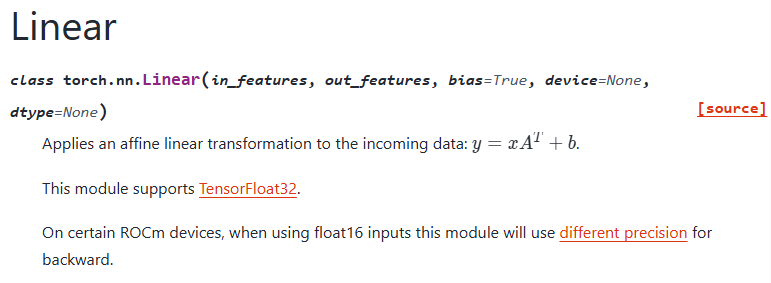

In [93]:
import torch
from torch import nn
from torch import optim

In [94]:
x = torch.FloatTensor([
    [1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]
])
y = torch.FloatTensor([
    [0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]
])

In [95]:
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [96]:
for epoch in range(10000):
    output = model(x)
    cost = criterion(output, y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

Epoch : 1000, Model : [Parameter containing:
tensor([[0.8884]], requires_grad=True), Parameter containing:
tensor([-0.6299], requires_grad=True)], Cost : 1.381
Epoch : 2000, Model : [Parameter containing:
tensor([[0.8848]], requires_grad=True), Parameter containing:
tensor([-0.5566], requires_grad=True)], Cost : 1.376
Epoch : 3000, Model : [Parameter containing:
tensor([[0.8826]], requires_grad=True), Parameter containing:
tensor([-0.5110], requires_grad=True)], Cost : 1.374
Epoch : 4000, Model : [Parameter containing:
tensor([[0.8812]], requires_grad=True), Parameter containing:
tensor([-0.4827], requires_grad=True)], Cost : 1.373
Epoch : 5000, Model : [Parameter containing:
tensor([[0.8803]], requires_grad=True), Parameter containing:
tensor([-0.4650], requires_grad=True)], Cost : 1.372
Epoch : 6000, Model : [Parameter containing:
tensor([[0.8798]], requires_grad=True), Parameter containing:
tensor([-0.4540], requires_grad=True)], Cost : 1.372
Epoch : 7000, Model : [Parameter contain

# 다중 선형 모델

In [120]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader 


train_x = torch.FloatTensor([
    [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]
])
train_y = torch.FloatTensor([
    [0.1, 1.5], [1, 2.8], [1.9, 4.1], [2.8, 5.4], [3.7, 6.7], [4.6, 8]
])

In [124]:
train_dataset = TensorDataset(train_x, train_y)

# 난수 고정
generator = torch.Generator()
generator.manual_seed(42)

train_dataloader = DataLoader(train_dataset, batch_size=2,
                              shuffle=True, drop_last=True) # drop_last : batch 사이즈 맞추고 남은 값 버림?

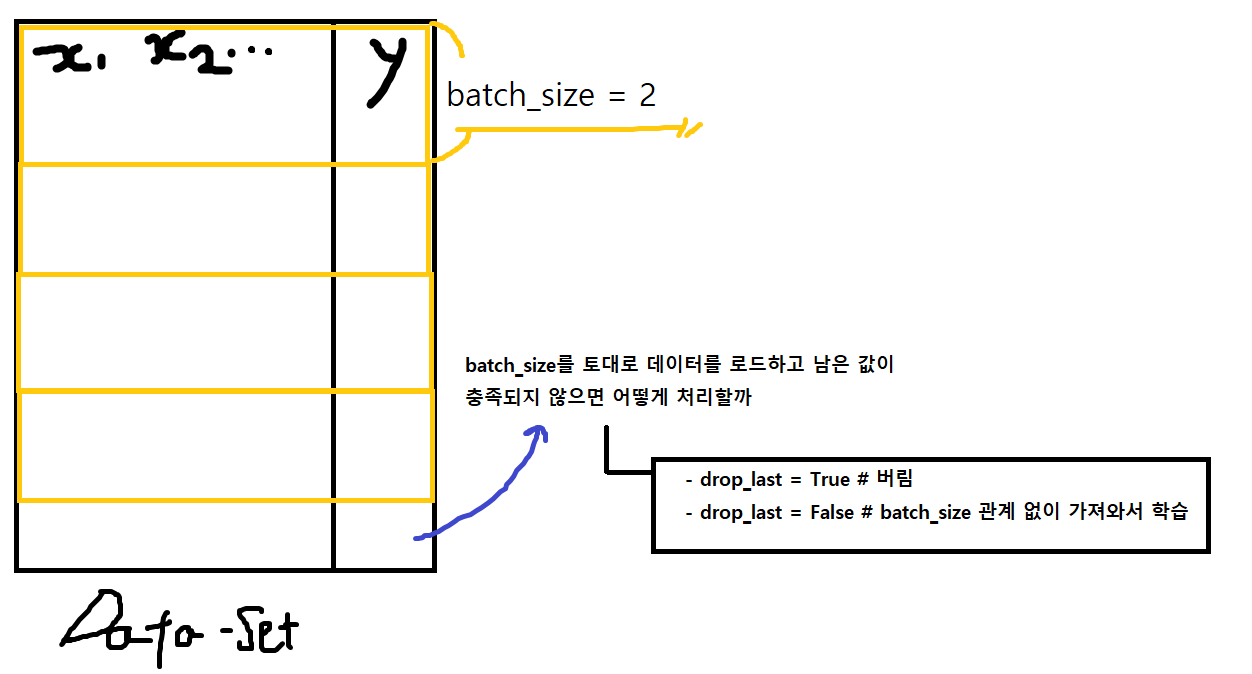

In [125]:
model = nn.Linear(2, 2, bias=True)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [126]:
for epoch in range(20000):
    cost = 0.0
    
    for batch in train_dataloader:
        x, y = batch
        output = model(x)
        
        loss = criterion(output, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        cost += loss

    cost = cost / len(train_dataloader)
    
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

Epoch : 1000, Model : [Parameter containing:
tensor([[0.5995, 0.0906],
        [0.8860, 0.3098]], requires_grad=True), Parameter containing:
tensor([-0.0080,  0.3287], requires_grad=True)], Cost : 0.095
Epoch : 2000, Model : [Parameter containing:
tensor([[ 0.8124, -0.0194],
        [ 0.9917,  0.2551]], requires_grad=True), Parameter containing:
tensor([-0.3310,  0.1683], requires_grad=True)], Cost : 0.025
Epoch : 3000, Model : [Parameter containing:
tensor([[ 0.9210, -0.0753],
        [ 1.0457,  0.2273]], requires_grad=True), Parameter containing:
tensor([-0.4955,  0.0865], requires_grad=True)], Cost : 0.006
Epoch : 4000, Model : [Parameter containing:
tensor([[ 0.9762, -0.1040],
        [ 1.0731,  0.2131]], requires_grad=True), Parameter containing:
tensor([-0.5793,  0.0449], requires_grad=True)], Cost : 0.002
Epoch : 5000, Model : [Parameter containing:
tensor([[ 1.0044, -0.1185],
        [ 1.0871,  0.2059]], requires_grad=True), Parameter containing:
tensor([-0.6220,  0.0237], requ

# 편향을 제거한 학습

In [116]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader 


train_x = torch.FloatTensor([
    [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]
])
train_y = torch.FloatTensor([
    [0.1, 1.5], [1, 2.8], [1.9, 4.1], [2.8, 5.4], [3.7, 6.7], [4.6, 8]
])

In [117]:
train_dataset = TensorDataset(train_x, train_y)
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=True)

In [118]:
model = nn.Linear(2, 2, bias=False) # bias = False를 통해 편향을 제거
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [119]:
for epoch in range(20000):
    cost = 0.0
    
    for batch in train_dataloader:
        x, y = batch
        output = model(x)
        
        loss = criterion(output, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        cost += loss

    cost = cost / len(train_dataloader)
    
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

Epoch : 1000, Model : [Parameter containing:
tensor([[ 0.8220, -0.0899],
        [ 0.4895,  0.6938]], requires_grad=True)], Cost : 0.074
Epoch : 2000, Model : [Parameter containing:
tensor([[ 1.0022, -0.2358],
        [ 0.6148,  0.5924]], requires_grad=True)], Cost : 0.046
Epoch : 3000, Model : [Parameter containing:
tensor([[ 1.1454, -0.3516],
        [ 0.7143,  0.5118]], requires_grad=True)], Cost : 0.029
Epoch : 4000, Model : [Parameter containing:
tensor([[ 1.2593, -0.4436],
        [ 0.7935,  0.4478]], requires_grad=True)], Cost : 0.019
Epoch : 5000, Model : [Parameter containing:
tensor([[ 1.3498, -0.5167],
        [ 0.8564,  0.3970]], requires_grad=True)], Cost : 0.012
Epoch : 6000, Model : [Parameter containing:
tensor([[ 1.4216, -0.5749],
        [ 0.9064,  0.3565]], requires_grad=True)], Cost : 0.007
Epoch : 7000, Model : [Parameter containing:
tensor([[ 1.4788, -0.6211],
        [ 0.9462,  0.3244]], requires_grad=True)], Cost : 0.005
Epoch : 8000, Model : [Parameter containi

In [115]:
model._parameters

{'weight': Parameter containing:
 tensor([[ 1.6999, -0.7999],
         [ 1.0999,  0.2001]], requires_grad=True),
 'bias': None}

# 비선형 회귀

In [136]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

In [137]:
class CustomDataset(Dataset):
    def __init__(self, file_path):
        df = pd.read_csv(file_path)
        self.x = df.iloc[:, 0].values
        self.y = df.iloc[:, 1].values
        self.length = len(df)

    def __getitem__(self, index):
        x = torch.FloatTensor([self.x[index] ** 2, self.x[index]])
        y = torch.FloatTensor([self.y[index]])
        return x, y

    def __len__(self):
        return self.length

In [138]:
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(2, 1)

    def forward(self, x):
        x = self.layer(x)
        return x

### 초기화 메서드에서 super() 함수로 부모 클래스를 초기화 했으므로 역방향 연산은 정의하지 않아도 됨
### Auto Grad 토치의 자동 기울기/변화도 계산

# 비선형 회귀

In [143]:
train_dataset = CustomDataset("datasets/non_linear.csv")
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)

In [147]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CustomModel().to(device)
model.parameters()

<generator object Module.parameters at 0x000001BDD90FEA40>

In [148]:
criterion = nn.MSELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.0001)

In [145]:
for epoch in range(10000):
    cost = 0.0

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

Epoch : 1000, Model : [Parameter containing:
tensor([[ 3.1155, -1.7008]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.4267], device='cuda:0', requires_grad=True)], Cost : 0.443
Epoch : 2000, Model : [Parameter containing:
tensor([[ 3.1142, -1.7024]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.3482], device='cuda:0', requires_grad=True)], Cost : 0.403
Epoch : 3000, Model : [Parameter containing:
tensor([[ 3.1126, -1.7023]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.2764], device='cuda:0', requires_grad=True)], Cost : 0.323
Epoch : 4000, Model : [Parameter containing:
tensor([[ 3.1121, -1.7024]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.2109], device='cuda:0', requires_grad=True)], Cost : 0.269
Epoch : 5000, Model : [Parameter containing:
tensor([[ 3.1103, -1.7028]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.1509], device='cuda:0', requires_grad=T

In [146]:
with torch.no_grad():
    model.eval()
    inputs = torch.FloatTensor(
        [
            [1 ** 2, 1],
            [5 ** 2, 5],
            [11 ** 2, 11]
        ]
    ).to(device)
    outputs = model(inputs)
    print(outputs)

tensor([[  1.4843],
        [ 69.2352],
        [357.2686]], device='cuda:0')


In [149]:
torch.save(
    model,
    "./models/model.pt"
)

In [150]:
torch.save(
    model.state_dict(),
    "./models/model_state_dict.pt"
)